# Salary Prediction of a Empoloyee with Respect to Years of Experience 

## Using Machine Learning and Python.

### Suman Rakshit ,ECE

 ## Import Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Loading the Dataset

In [23]:
df = pd.read_csv (r'D:\ML Data base\Salary.csv')
print (df)

    Years_Experience    Salary
0                1.1   37731.0
1                1.3   39343.0
2                1.5   46205.0
3                2.0   43525.0
4                2.2   39891.0
5                2.9   56642.0
6                3.0   60150.0
7                3.2   54445.0
8                3.2   64445.0
9                3.7   57189.0
10               3.9   63218.0
11               4.0   55794.0
12               4.0   56957.0
13               4.1   57081.0
14               4.5   61111.0
15               4.9   67938.0
16               5.1   66029.0
17               5.3   83088.0
18               5.9   81363.0
19               6.0   93940.0
20               6.8   91738.0
21               7.1   98273.0
22               7.9  101302.0
23               8.2  113812.0
24               8.7  109431.0
25               9.0  105582.0
26               9.5  116969.0
27               9.6       NaN
28               9.9  112833.0
29              10.3  122391.0
30              10.5  121872.0
31      

# Chekc null value is present or not

In [24]:
df.isnull().sum()

Years_Experience    0
Salary              2
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years_Experience  51 non-null     float64
 1   Salary            49 non-null     float64
dtypes: float64(2)
memory usage: 944.0 bytes


In [26]:
df.describe()

,Years_Experience,Salary
count,51.000000,49.000000
mean,9.464706,104130.244898
std,5.797373,42488.762288
min,1.100000,37731.000000
25%,4.050000,61111.000000
50%,9.000000,109431.000000
75%,14.250000,142500.000000
max,20.000000,175000.000000


## Visualize data

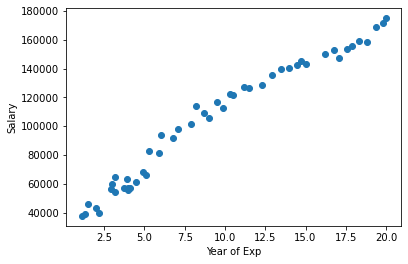

In [27]:
plt.scatter(x =df.Years_Experience, y =df.Salary)
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()

## Preparing the Data for Machine Learning Algorithms

In [30]:
#cleaning the data before implantation
df.isnull().sum()

Years_Experience    0
Salary              2
dtype: int64

In [31]:
df.mean()

Years_Experience         9.464706
Salary              104130.244898
dtype: float64

In [32]:
df2 = df.fillna(df.mean())

In [33]:
print(df2)

    Years_Experience         Salary
0                1.1   37731.000000
1                1.3   39343.000000
2                1.5   46205.000000
3                2.0   43525.000000
4                2.2   39891.000000
5                2.9   56642.000000
6                3.0   60150.000000
7                3.2   54445.000000
8                3.2   64445.000000
9                3.7   57189.000000
10               3.9   63218.000000
11               4.0   55794.000000
12               4.0   56957.000000
13               4.1   57081.000000
14               4.5   61111.000000
15               4.9   67938.000000
16               5.1   66029.000000
17               5.3   83088.000000
18               5.9   81363.000000
19               6.0   93940.000000
20               6.8   91738.000000
21               7.1   98273.000000
22               7.9  101302.000000
23               8.2  113812.000000
24               8.7  109431.000000
25               9.0  105582.000000
26               9.5  116969

In [35]:
df2.isnull().sum()

Years_Experience    0
Salary              0
dtype: int64

## Split Data into Training and Testing Data

In [36]:
X = df2.drop("Salary", axis = "columns")
y = df2.drop("Years_Experience", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (51, 1)
shape of y =  (51, 1)


In [37]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (40, 1)
shape of y_train =  (40, 1)
shape of X_test =  (11, 1)
shape of y_test =  (11, 1)


## Selecting The Model and Trained it

In [38]:
# We can see in the scatter plot that the data is forming a straight line.
# So, we can use the formula of the straight line [Y= mX + C].
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [39]:
lr.coef_

array([[7006.20346229]])

In [40]:
lr.intercept_

array([39432.16137989])

In [41]:
lr.predict([[5]])

array([[74463.17869133]])

In [42]:
lr.predict([[6]])[0][0]

81469.38215361902

In [43]:
lr.predict([[6]])[0][0].round(2)

81469.38

## Testing The Model

In [44]:
pred = lr.predict(X_test)
pred

array([[ 54845.80899692],
       [175352.50854828],
       [ 73762.5583451 ],
       [ 67456.97522904],
       [ 47138.98518841],
       [178154.9899332 ],
       [122805.98258112],
       [ 70960.07696019],
       [144525.21331421],
       [105991.09427163],
       [164843.20335485]])

In [46]:
y_test

,Salary
4,39891.000000
48,168596.000000
15,67938.000000
12,56957.000000
0,37731.000000
49,171583.000000
33,104130.244898
14,61111.000000
40,143000.000000
26,116969.000000


In [47]:
lr.score(X_test , y_test)

0.9554659217405527

## Check Actual data , Predicted data and difference between the Actual and Predicted data

In [49]:
diff = y_test - pred

In [51]:
pd.DataFrame(np.c_[y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,39891.000000,54845.808997,-14954.808997
1,168596.000000,175352.508548,-6756.508548
2,67938.000000,73762.558345,-5824.558345
3,56957.000000,67456.975229,-10499.975229
4,37731.000000,47138.985188,-9407.985188
5,171583.000000,178154.989933,-6571.989933
6,104130.244898,122805.982581,-18675.737683
7,61111.000000,70960.076960,-9849.076960
8,143000.000000,144525.213314,-1525.213314
9,116969.000000,105991.094272,10977.905728


## Fine-tune the Model

In [81]:
lr.score(X_test,y_test)

0.9554659217405527

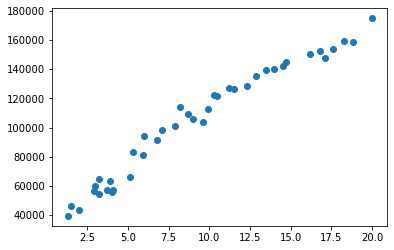

In [82]:
plt.scatter(X_train,y_train)

## Visualize Model, that how it is performing on training data

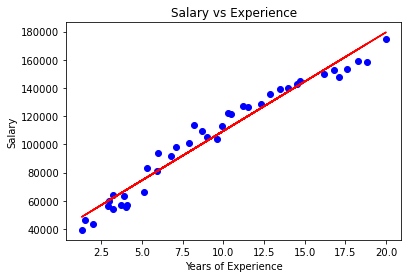

In [53]:
plt.scatter(X_train , y_train , color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

## Visualize Model, that how it is performing on testing data

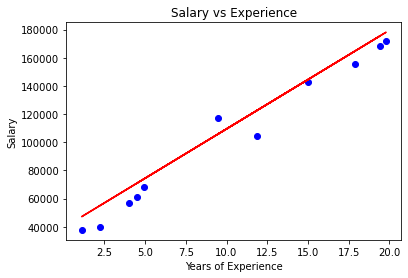

In [54]:
plt.scatter(X_test , y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [57]:
rmse , r2

(10438.209794356537, 0.9554659217405527)

In [66]:
lr.predict([[20.15]])[0][0]

180607.1611449983

## Evluate the Model

In [69]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train , y_train)

DecisionTreeRegressor()

In [70]:
pred1 = dtr.predict(X_test)
pred1

array([ 43525.        , 158612.        ,  66029.        ,  55794.        ,
        39343.        , 175000.        , 126756.        ,  57081.        ,
       145000.        , 104130.24489796, 153652.        ])

In [71]:
y_test

,Salary
4,39891.000000
48,168596.000000
15,67938.000000
12,56957.000000
0,37731.000000
49,171583.000000
33,104130.244898
14,61111.000000
40,143000.000000
26,116969.000000


In [73]:
rmse1 = np.sqrt(mean_squared_error(y_test,pred1))
r21 = r2_score(y_test,pred1)
rmse1,r21

(8702.690234570127, 0.9690438119574805)

## Save The Model and Check if its work Accordingly

In [78]:
import joblib
joblib.dump(lr, "Empolyeies Salary Predictor.pkl")

['Empolyeies Salary Predictor.pkl']

In [79]:
model = joblib.load("Empolyeies Salary Predictor.pkl")

In [80]:
model.predict([[15]])[0][0].round(2)

144525.21